[Reference](https://bryanpaget.medium.com/visualpython-1730c03368c8)

In [1]:
# !pip install -U jupyterlab-visualpython plotly wordcloud

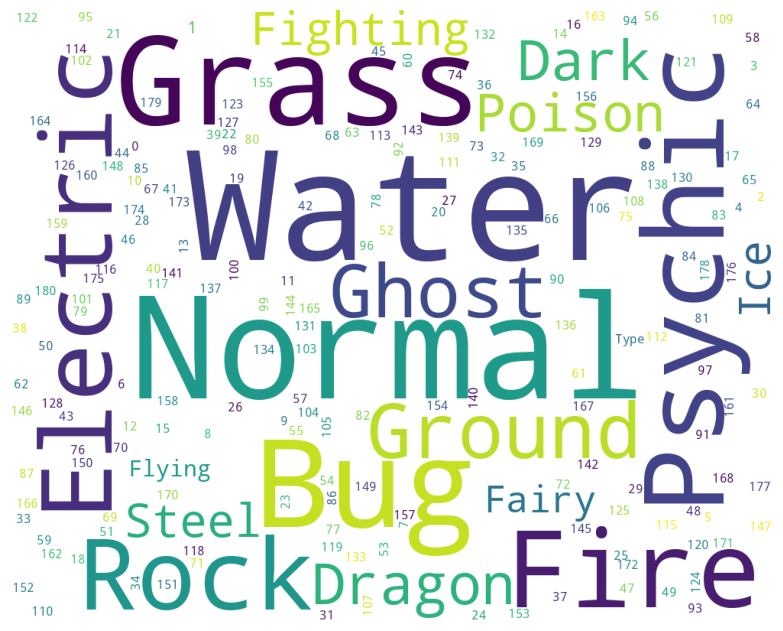

In [23]:
import pandas as pd
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline


pokemon_df = pd.read_csv("https://raw.githubusercontent.com/bryanpaget/html/main/pokemon.csv")
counts = Counter(pokemon_df[["Type 1"]].to_string().split())
tags = counts.most_common(200)

wc = WordCloud(max_font_size=200, background_color='white', width=1000, height=800)
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(8, 20))
plt.imshow(cloud)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
import pyarrow as pa

init_notebook_mode(connected=True)
%matplotlib inline

vp_df = pokemon_df[['HP', 'Attack', 'Defense', 'Speed']].copy()
vp_df.head()

,HP,Attack,Defense,Speed
0,45,49,49,45
1,60,62,63,60
2,80,82,83,80
3,80,100,123,80
4,39,52,43,65


In [25]:
from IPython.display import display, Markdown
display(pd.DataFrame({
    'N Total':vp_df.shape[0],
    'N Valid':vp_df.count(numeric_only=True),
    'N Missing':vp_df.loc[:,vp_df.apply(pd.api.types.is_numeric_dtype)].isnull().sum(),
    'Mean':vp_df.mean(numeric_only=True),
    'Median':vp_df.median(numeric_only=True),
    'Mode':vp_df.mode(numeric_only=True).iloc[0],
    'Sum':vp_df.sum(numeric_only=True),
    'Minimun':vp_df.min(numeric_only=True),
    'Maximum':vp_df.max(numeric_only=True),
    'Range':vp_df.max(numeric_only=True) - vp_df.min(numeric_only=True),
    'Std. deviation':vp_df.std(numeric_only=True),
    'S.E. mean':vp_df.std(numeric_only=True)/np.sqrt(vp_df.count(numeric_only=True)),
    'Skewness':vp_df.skew(numeric_only=True),
    'Kurtosis':vp_df.kurtosis(numeric_only=True),
    'Percentile: 25':vp_df.quantile(q=0.25, numeric_only=True),
    'Percentile: 50':vp_df.quantile(q=0.50, numeric_only=True),
    'Percentile: 75':vp_df.quantile(q=0.75, numeric_only=True),
}).round(3).T)

,HP,Attack,Defense,Speed
N Total,800.000,800.000,800.000,800.000
N Valid,800.000,800.000,800.000,800.000
N Missing,0.000,0.000,0.000,0.000
Mean,69.259,79.001,73.842,68.278
Median,65.000,75.000,70.000,65.000
Mode,60.000,100.000,70.000,50.000
Sum,55407.000,63201.000,59074.000,54622.000
Minimun,1.000,5.000,5.000,5.000
Maximum,255.000,190.000,230.000,180.000
Range,254.000,185.000,225.000,175.000


In [26]:
for col in vp_df.columns:
    if pd.api.types.is_numeric_dtype(vp_df[col]) and  vp_df[col].value_counts().size > 10:
        _bins = 10
    else: _bins = None

    _dfr = pd.DataFrame({
              'Frequency':vp_df[col].value_counts(bins=_bins, sort=False),
              'Percent':100*(vp_df[col].value_counts(bins=_bins, sort=False) / vp_df[col].size),
              'Valid percent':100*(vp_df[col].value_counts(bins=_bins, sort=False)/vp_df[col].count())
}).round(2)
    _dfr['Cumulative percent'] = _dfr['Valid percent'].cumsum()
    _dfr.loc['N Valid',:] =  _dfr.iloc[:,:3].sum()
    _dfr.loc['N Missing','Frequency'] =  vp_df[col].isnull().sum()
    _dfr.loc['N Total','Frequency'] =  vp_df[col].size
    display(Markdown(f"### {col}"))
    display(_dfr)

### HP

,Frequency,Percent,Valid percent,Cumulative percent
"(0.745, 26.4]",10.0,1.25,1.25,1.25
"(26.4, 51.8]",202.0,25.25,25.25,26.50
"(51.8, 77.2]",336.0,42.00,42.00,68.50
"(77.2, 102.6]",186.0,23.25,23.25,91.75
"(102.6, 128.0]",50.0,6.25,6.25,98.00
"(128.0, 153.4]",10.0,1.25,1.25,99.25
"(153.4, 178.8]",3.0,0.38,0.38,99.63
"(178.8, 204.2]",1.0,0.12,0.12,99.75
"(204.2, 229.6]",0.0,0.00,0.00,99.75
"(229.6, 255.0]",2.0,0.25,0.25,100.00


### Attack

,Frequency,Percent,Valid percent,Cumulative percent
"(4.814, 23.5]",16.0,2.00,2.00,2.00
"(23.5, 42.0]",72.0,9.00,9.00,11.00
"(42.0, 60.5]",172.0,21.50,21.50,32.50
"(60.5, 79.0]",162.0,20.25,20.25,52.75
"(79.0, 97.5]",165.0,20.62,20.62,73.37
"(97.5, 116.0]",101.0,12.62,12.62,85.99
"(116.0, 134.5]",65.0,8.12,8.12,94.11
"(134.5, 153.0]",29.0,3.62,3.62,97.73
"(153.0, 171.5]",13.0,1.62,1.62,99.35
"(171.5, 190.0]",5.0,0.62,0.62,99.97


### Defense

,Frequency,Percent,Valid percent,Cumulative percent
"(4.774, 27.5]",14.0,1.75,1.75,1.75
"(27.5, 50.0]",198.0,24.75,24.75,26.50
"(50.0, 72.5]",234.0,29.25,29.25,55.75
"(72.5, 95.0]",196.0,24.50,24.50,80.25
"(95.0, 117.5]",85.0,10.62,10.62,90.87
"(117.5, 140.0]",51.0,6.38,6.38,97.25
"(140.0, 162.5]",12.0,1.50,1.50,98.75
"(162.5, 185.0]",5.0,0.62,0.62,99.37
"(185.0, 207.5]",2.0,0.25,0.25,99.62
"(207.5, 230.0]",3.0,0.38,0.38,100.00


### Speed

,Frequency,Percent,Valid percent,Cumulative percent
"(4.824, 22.5]",30.0,3.75,3.75,3.75
"(22.5, 40.0]",129.0,16.12,16.12,19.87
"(40.0, 57.5]",151.0,18.88,18.88,38.75
"(57.5, 75.0]",184.0,23.00,23.00,61.75
"(75.0, 92.5]",128.0,16.00,16.00,77.75
"(92.5, 110.0]",123.0,15.38,15.38,93.13
"(110.0, 127.5]",35.0,4.38,4.38,97.51
"(127.5, 145.0]",14.0,1.75,1.75,99.26
"(145.0, 162.5]",5.0,0.62,0.62,99.88
"(162.5, 180.0]",1.0,0.12,0.12,100.00


### Histogram

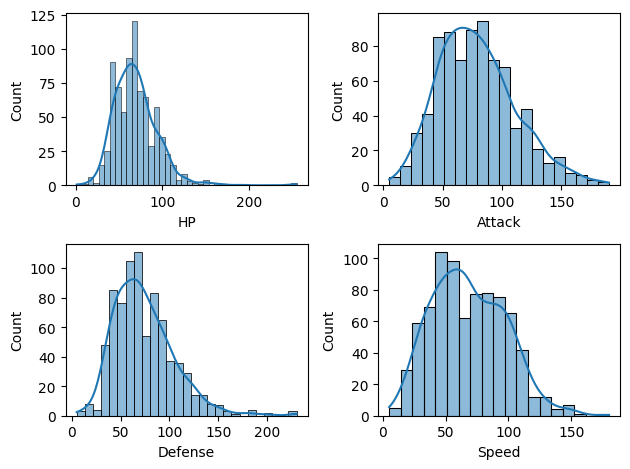

### Scatter Plot

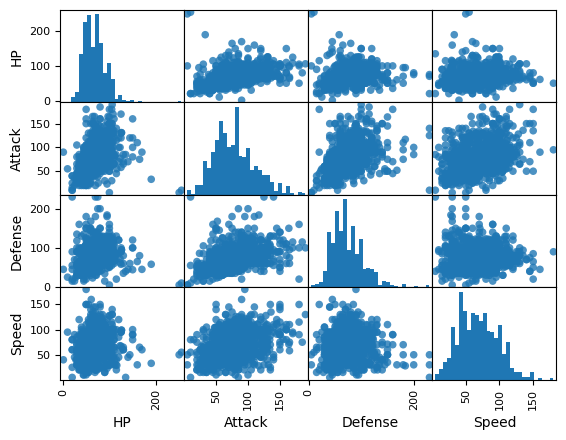

### Boxplot

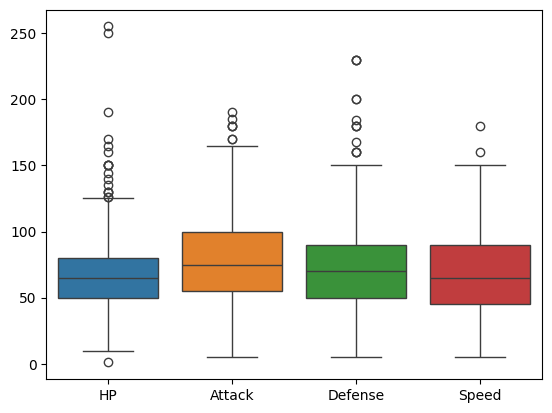

In [27]:
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)

    display(Markdown("### Histogram"))
    idx = 1
    for col in vp_df.columns:
        plt.subplot(2,2, idx)
        if pd.api.types.is_numeric_dtype(vp_df[col]) and  vp_df[col].value_counts().size > 10:
            sns.histplot(data=vp_df, x=col, kde=True)
        else:
            sns.countplot(data=vp_df, x=col)

        if idx < 4:
            idx += 1
        else:
            idx = 1
            plt.tight_layout()
            plt.show()

    display(Markdown("### Scatter Plot"))
    pd.plotting.scatter_matrix(vp_df, marker='o', hist_kwds={'bins': 30}, s=30, alpha=.8)
    plt.show()

    display(Markdown("### Boxplot"))
    sns.boxplot(vp_df)
    plt.show()

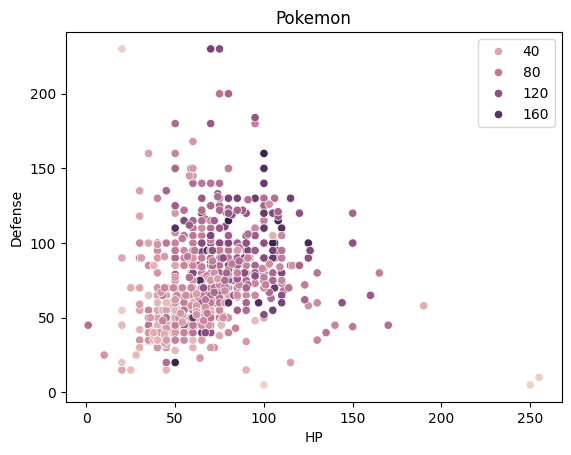

In [28]:
sns.scatterplot(data=pokemon_df, x='HP', y='Defense', hue='Attack', color='#d6d6d6')
plt.legend(loc='upper right')
plt.title('Pokemon')
plt.xlabel('HP')
plt.ylabel('Defense')
plt.show()